# Autonomní rovnice a systémy

Tento zápisník obsahuje výpočty k cvičení z Aplikované matematiky věnované [autonomním systémům](http://user.mendelu.cz/marik/am/slidy/cviceni/cviceni10.md.html). 

In [ ]:
import matplotlib.pyplot as plt   # knihovna pro statické grafy a grafy kreslit sem do zápisníku
%matplotlib inline               


import numpy                      # knihovna pro numerické výpočty
from scipy.integrate import solve_ivp  # řešení diferenciálních rovnic

import bokeh.io                   # knihovna pro kreslení interaktivních grafů
import bokeh.plotting             # knihovna pro kreslení interaktivních grafů
bokeh.io.output_notebook()        # grafy kreslit sem do zápisníku

colors = 10*bokeh.palettes.Greens5  # paleta barev

## Skladování stavebního recyklátu

Hromada sypkého materiálu má tvar kužele. Úhel u vrcholu je konstantní, daný mechanickými vlastnostmi materiálu a je nezávislý na objemu. 

* Předpokládejme, že personál stavebnin přisypává na hromadu materiál konstantní rychlostí (v jednotkách objemu za jednotku času). 
* Tato hromada je však v poměrně otevřené krajině a vítr rozfoukává materiál po okolí. Je rozumné předpokládat, že rozfoukávání (opět v jednotkách objemu za jednotku času) se děje rychlostí úměrnou povrchu návětrné strany pláště.

Diferenciální rovnice popisující růst hromady je 
\\[
\frac{\mathrm dV}{\mathrm dt} = R - k_0S
\\]
a po vyjádření pomocí objemu 
\\[
\frac{\mathrm dV}{\mathrm dt} = R - k V^{\frac 23},
\\]
kde $R$ a $k$ jsou konstanty. Vhodnou volbou jednotky objemu můžeme docílit toho, že jsou tyto konstanty numericky stejné a vhodnou volbou jednotky času poté toto, že tato společná hodnota je rovna jedné. Budeme tedy modelovat rovnici pro $R=k=1$. Na obrázku vidíme jediné stabilní řešení, které je globálně atraktivní.

In [ ]:
tspan = numpy.linspace(0, 10, 1000)            # Definice časových značek
p = bokeh.plotting.figure(title="Skladování recyklátu", x_axis_label='čas', y_axis_label='výška hromady',plot_width=1000)

for i in range(0,15):                          # Cyklus přes počátečnmí podmínky
    sol = solve_ivp(lambda t, y: 1-y**(2/3), [tspan[0], tspan[-1]], [i/10], t_eval=tspan)  # Vyřešení rovnice pro danou počáteční podmínku
    p.line(sol.t, sol.y[0], color=colors[i], legend_label="V(0)=%s"%str(i/10), width=3)    # Vykreslení řešení

p.legend.click_policy="hide"                   # Skrývat křivky po kliknutí na legendu
bokeh.plotting.show(p)                         # Vykreslení řešení

## Propeptid kolagenu

Kolagen je klíčový protein pojivových tkání. Jeden z kroků při syntéze kolagenu spočívá v reakci tří molekul propeptidu kolagenu, zkráceně propeptidu. Tento propeptid se formuje konstantní rychlostí a kromě toho, že je surovinou pro produkci kolagenu, se ještě rozpadá rychlostí úměrnou koncentraci. Modelem je rovnice 
\\[\frac{\mathrm dP}{\mathrm dt}=-k_1 P^3 +k_2-k_3 P,\\]
kde $k_i$ jsou konstanty. Rovnici je možno přepsat do tvaru \\[\frac{\mathrm dP}{\mathrm dt}=\Bigl(k_2-k_3 P\Bigr)-\Bigl(k_1 P^3\Bigr) \\]
s rozdílem klesající a rostoucí funkce na pravé straně. Tyto funkce mají jediný průsečík a proto má rovnice jediný stacionární bod. Tento bod je stabilní, protože pro vysoké hodnoty $P$ je pravá strana rovnice $-k_1P^3$ záporná (dominantní člen je
) a pro malé hodnoty je pravá strana $k_2-k_3P$ kladná (v nule je rovna konstantě $k_2$).

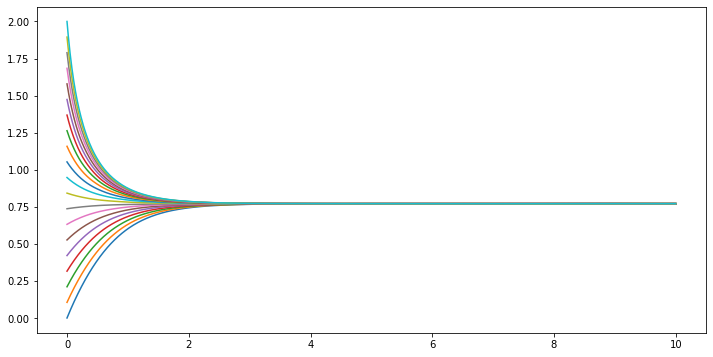

In [ ]:
tspan = numpy.linspace(0, 10, 1000)           # Časy, ve kterých se bude počítat řešení
plt.figure(figsize=(12,6))                    # Inicializace obrázku, rozměry
for podminka in numpy.linspace(0,2,20):       # Cyklus pro počáteční podmínky
    sol = solve_ivp(lambda t, P: -0.5*P**3+1-P, [tspan[0], tspan[-1]], [podminka], t_eval=tspan)
    plt.plot(sol.t, sol.y[0])
None

## Jelen a los

Uvažujme populaci jelenů a losů. Tyto populace spolu soupeří o potravu. Bez konkurence by populace jelena rostla rychlostí $3$
a populace losa rychlostí $2$ na jeden kus. Vnitrodruhová konkurence se projevuje v obou populacích stejně a je rovna druhé mocnině příslušné velikosti populace. Mezidruhová konkurence je vyjádřena členem rovným součinu velikosti populací a tato konkurence se projeví s koeficientem $0.5$ v populaci losa a s koeficientem $1$ v populaci jelena.

Sestavte matematický model a otestujte jej numerickým experimentem na stabilitu stacionárních bodů. Poté zdvojnásobte parametry mezidruhové konkurence a sledujte změnu odezvy.

Modelem je následující autonomní systém.
\\[
\begin{aligned}
  \frac{\mathrm dx}{\mathrm dt}&=3x-xy-x^2
  \cr
    \frac{\mathrm dy}{\mathrm dt}&=2y-0.5xy-y^2
\end{aligned}
\\]


In [ ]:
def jelen_a_los(t, z, parametry):   # Definice interakce mezi jeleny a losy
    x, y = z
    a, b, c, d, e, f = parametry
    return [a*x - b*x*y - c*x**2, d*y - e*x*y - f*y**2]

sol=[None,None]                                        # pole pro reseni
par = [ [3, 1, 1, 2, 0.5, 1] , [3, 2, 1, 2, 1  , 1] ]  # pole pro nastavení parametrů
# vyřešení rovnice pro jednotlivé hodnoty parametrů, u každého nastavení řešíme dvě počáteční úlohy a budeme kreslit dvě trajektorie
sol[0] = [ solve_ivp(jelen_a_los, [0, 20], pocatek, args=([par[0]]), dense_output=True) for pocatek in [[2,2],[1,0.5]] ]
sol[1] = [ solve_ivp(jelen_a_los, [0, 20], pocatek, args=([par[1]]), dense_output=True) for pocatek in [[2,2],[1,0.5]] ]

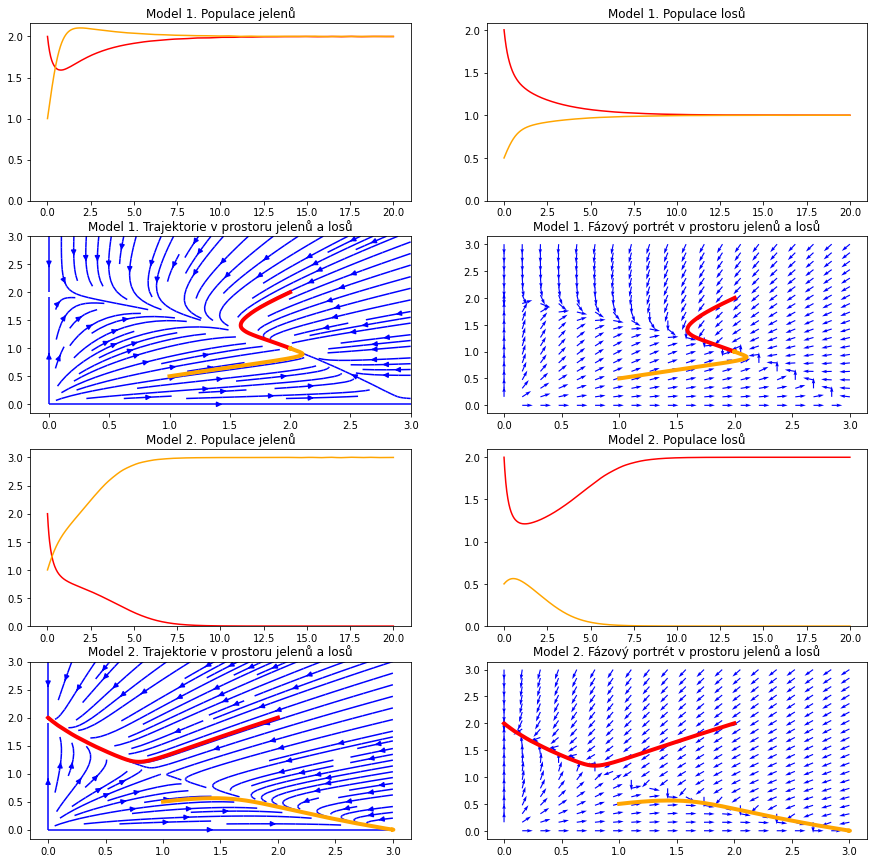

In [ ]:
import warnings
warnings.filterwarnings('ignore')              # ignorovat chyby při dělení nulou při dělení délkou vektoru

fig, ax = plt.subplots(4, 2, figsize=(15,15))  # nastavenní velikosti obrázku a počtu podobrázků
t = numpy.linspace(0, 20, 1000)                # nastavení časových značek

colors=['red','orange','green']                # pole pro střídání barev

for j in [0,1]:                                # cyklus pro nastavení parametrů, vždy kreslí do dvou řad
    for i in [0,1]:                            # cyklus přes počáteční podmínky s daným nastavením parametrů
        reseni=sol[j][i].sol(t)                # uložení odpovídajícího řešení
        ax[2*j,0].plot(t,reseni[0], color=colors[i])  # vykreslení časovového průběhu první komponenty řešení, jeleni, obrázek vlevo nahoře
        ax[2*j,1].plot(t,reseni[1], color=colors[i])  # vykreslení časovového průběhu druhé komponenty řešení, losi, obrázek vpravo nahoře
        ax[2*j+1,1].plot(reseni[0],reseni[1], color=colors[i], linewidth=4) # vykreslení trajektorie do obou obrázků v dolní řadě čtveřice
        ax[2*j+1,0].plot(reseni[0],reseni[1], color=colors[i], linewidth=4) 

    y, x = numpy.mgrid[0:3:20j, 0:3:20j]                       # mřížka pro vykreslení směrového pole a trajektorií
    U,V = jelen_a_los(t,[x,y],par[j])                          # směrové pole
    ax[2*j+1,0].streamplot(x, y, U, V, color='blue')           # trajektorie do obrázku vlevo dole
    U, V =U/numpy.sqrt(U**2+V**2), V/numpy.sqrt(U**2+V**2)     # směrové pole s normalizovanou délkou vektoru
    ax[2*j+1,1].quiver(x, y, U, V, color='blue', lw=.01)       # vykreslení směrového pole

    ax[2*j,0].set_title("Model %s. Populace jelenů"%str(j+1))  # nadpis v grafu nahoře vlevo
    ax[2*j,1].set_title("Model %s. Populace losů"%str(j+1))    # nadpis v grafu nahoře vpravo
    ax[2*j,0].set_ylim([0,None])                               # svislou osu zacinat od nuly v grafu nahoře vlevo
    ax[2*j,1].set_ylim([0,None])                               # svislou osu zacinat od nuly v grafu nahoře vpravo
    ax[2*j+1,0].set_title("Model %s. Trajektorie v prostoru jelenů a losů"%str(j+1))
    ax[2*j+1,1].set_title("Model %s. Fázový portrét v prostoru jelenů a losů"%str(j+1))
None

## Puštík obecný

Puštík obecný se téměř výhradně živí malými hlodavci. Předpokládejme následující vztahy. 

* Populace hlodavců má porodnost $0.1$ na jedince a úmrtnost $0.025$ na jedince za jednotku času. 
* Rychlost s jakou jeden puštík konzumuje hlodavce je úměrná počtu hlodavců s konstantou úměrnosti $0.01$. Porodnost v populaci puštíka je úměrná množství zkonzumované potravy s konstantou úměrnosti $0.05$. 
* Úmrtnost v populaci puštíka je $0.1$ na jedince za jednotku času.

---------------

Uvedné vztahy je možné modelovat následující soustavou diferenciálních rovnic.
\\[
\begin{aligned}
  \frac{\mathrm dx}{\mathrm dt}&=0.1 x-0.025x-0.01xy\cr
  \frac{\mathrm dy}{\mathrm dt}&=-0.1y+0.05xy  
\end{aligned}
\\]


In [ ]:
def pustik_a_hlodavec(t, z):
    x, y = z
    a, b, c, d, e = 0.1, 0.025, 0.01, 0.1, 0.05
    return [a*x - b*x - c*x*y, -d*y + e*x*y]

xmax, ymax=5, 20

y, x = numpy.mgrid[0:ymax:20j, 0:xmax:20j]
U,V = pustik_a_hlodavec(t,[x,y])

pocatek = [2,10]
sol = solve_ivp(pustik_a_hlodavec, [0, 200], pocatek, dense_output=True)  
t = numpy.linspace(0, 200, 1000)
reseni=sol.sol(t)

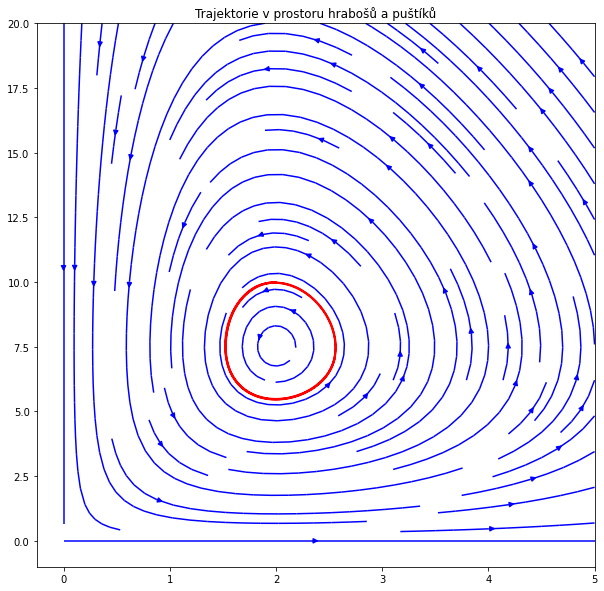

In [ ]:
fig = plt.figure(figsize=(10,10))
plt.streamplot(x, y, U, V, color='blue')
plt.plot(reseni[0],reseni[1], color='red', linewidth=2)
plt.title("Trajektorie v prostoru hrabošů a puštíků")
None


Vidíme oscilatorický průběh. Ten je dán tím, že puštík sám bez sebe bez potravy nepřežije. V období hojnosti puštík má dostatek potravy, jeho populace roste. Tím však spotřebovává stále více hlodavců a od určitého limitu začne hlodavců ubývat. Tento vývoj trvá, dokud není populace puštíka zredukována natolik, že již nebrání hlodavcům v růstu jejich populace. Tím se populace hlodavců namnoží a začne období hojnosti pro puštíka, čímž se uzavře cyklus.

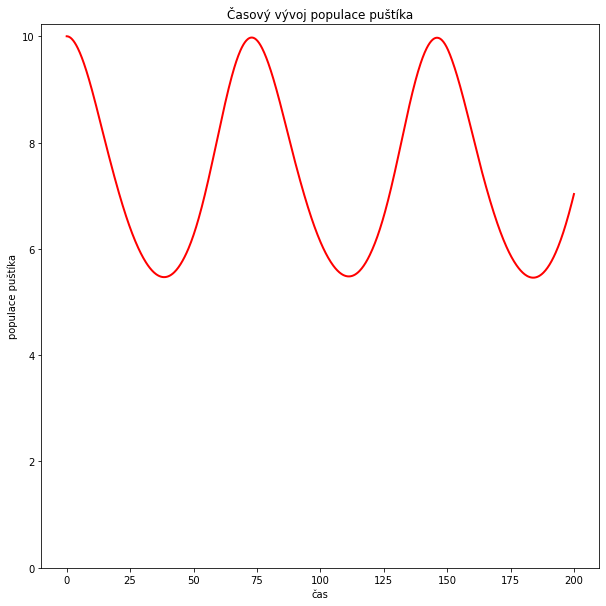

In [ ]:
fig = plt.figure(figsize=(10,10))                 # definice obrazku
ax = fig.add_subplot(1, 1, 1)                     # zpristupneni manipulace s osami
plt.plot(t,reseni[1], color='red', linewidth=2)   # nakresleni druhe komponenty reseni (Python indexuje od nuly)
plt.title("Časový vývoj populace puštíka")        # nadpis
ax.set_ylim([0,None])                             # osa y začne na nule
ax.set_xlabel("čas")                              # popisek na ose x
ax.set_ylabel("populace puštíka")                 # popisek na ose y
None  

## Kůň Převalského 

Kůň Převalského je divoký kůň ze střední Asie, jediný druh koně, který nebyl domestikován. V divočině jsou tyto koně loveni vlky. Napište matematický model založený na následujících předpokladech. Porodnost v populaci koní je $0.15$ na jedince. Úmrtnost v populaci koní je $0.01$ na jedince. Vlci se živí i jinou potravou, mají tedy kladnou porodnost. Ta je $0.1$ na jedince. Vlci mají konstantní úmrtnost $0.05$ na jedince. Pravděpodobnost s jakou je kůň uloven vlkem je úměrná počtu vlků s konstantou úměrnosti $0.02$.

Matematickým modelem je následující dvojice rovnic.
\\[
\begin{aligned}
  \frac{\mathrm dx}{\mathrm dt}&=0.15 x-0.01x-0.05xy\cr
  \frac{\mathrm dy}{\mathrm dt}&=0.1y-0.05y  
\end{aligned}
\\]


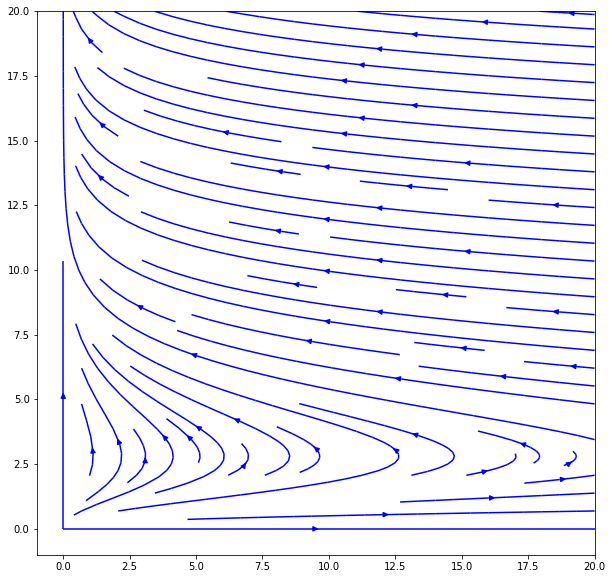

In [ ]:
def kun_a_vlk(t, z):
    x, y = z
    return [0.15*x - 0.01*x - 0.05*x*y, 0.1*y -0.05*y]

xmax, ymax=20, 20
y, x = numpy.mgrid[0:ymax:20j, 0:xmax:20j]
U, V = kun_a_vlk(t,[x,y])

fig = plt.figure(figsize=(10,10))
plt.streamplot(x, y, U, V, color='blue')
None

Populace vlků stále roste. Populace koní má při malých hodnotách vlků prostor pro růst (v dolní části obrázku trajektorie směřují doprava), ale tento růst je časově omezený a populace koní tedy koexistenci s populací vlků nepřežije, pokud se vzájemná interakce bude řídit uvedenými předpoklady.

## Systém, vlastní čísla a vlastní směry

Úloha ze cvičení. Nakreslíme si do obrázku vlastní vektory a trajektorie v okolí stacionárního bodu. Stacionární bod je nestabilním uzlem.
\\[
\begin{aligned}
  \frac{\mathrm dx}{\mathrm dt}&= 4x^2y+y^3-5\cr
  \frac{\mathrm dy}{\mathrm dt}&= 3xy^2-3y
\end{aligned}
\\]


In [ ]:
def system(t, z):
    x, y = z
    return [4*x**2*y+y**3-5, 3*x*y**2-3*y]

def Jacobi(z):
    x, y = z
    return [[8*x*y, 4*x**2 + 3*y**2],[3*y**2, 6*x*y-3]]    

In [ ]:
from numpy import linalg as LA
x0, y0 = 1, 1
J=Jacobi([x0,y0])
vlastni_cisla, vlastni_smery = LA.eig(J)
e1=vlastni_smery[:,0]
e2=vlastni_smery[:,1]

Do jednoho obrázku nakreslíme trajektorie a vlastní vektory Jacobiho matice. Je vidět, že v okolí stacionárního bodu se trajektorie řídí vypočtenými vlastními směry. Vlastně jenom jedním, protože vlastní hodnoty jsou $10$ a $0.3$ a v exponenciální závislosti jasně dominuje vyšší hodnota. Proto trajektorie "drží" směr vlastního vektoru příslušného vyšší vlastní hodnotě, tj. červený směr. 

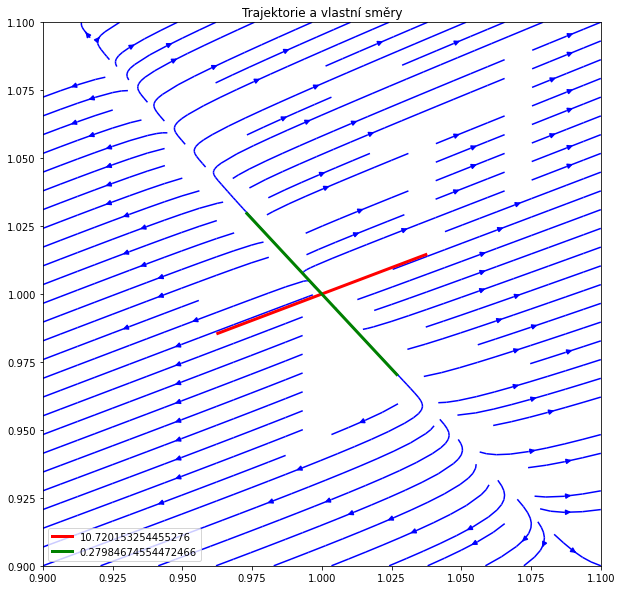

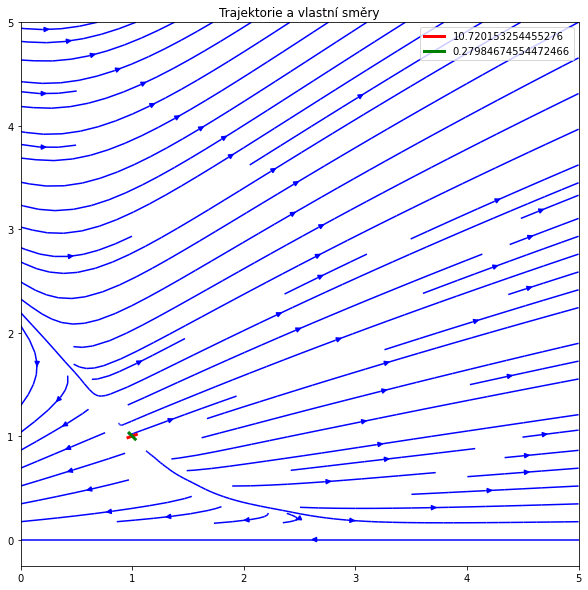

In [ ]:
fig = plt.figure(figsize=(10,10))

xmin, xmax, ymin, ymax = 0.9, 1.1, 0.9, 1.1
y, x = numpy.mgrid[ymin:ymax:20j, xmin:xmax:20j]
U, V = system(t,[x,y])
plt.streamplot(x, y, U, V, color='blue')

krok = 0.04
plt.title("Trajektorie a vlastní směry")
plt.plot([x0-krok*e1[0],x0+krok*e1[0]],[y0-krok*e1[1],y0+krok*e1[1]], color='red', lw=3, label=str(vlastni_cisla[0]))
plt.plot([x0-krok*e2[0],x0+krok*e2[0]],[y0-krok*e2[1],y0+krok*e2[1]], color='green', lw=3, label=str(vlastni_cisla[1]))
plt.legend()

# Ukazka recyklace kodu. Az na nastaveni xmin, xmax, ... je vse stejne jako vyse
# Neni to uplne optimalni postup, pro kod u ktereho se predpoklada kratka zivotnost 
# (kod vznikly behem uceni nebo pro jednorazove vyuziti) to muze byt akceptovatelne

fig = plt.figure(figsize=(10,10))

xmin, xmax, ymin, ymax = 0, 5, 0, 5
y, x = numpy.mgrid[ymin:ymax:20j, xmin:xmax:20j]
U, V = system(t,[x,y])
plt.streamplot(x, y, U, V, color='blue')

krok = 0.04
plt.title("Trajektorie a vlastní směry")
plt.plot([x0-krok*e1[0],x0+krok*e1[0]],[y0-krok*e1[1],y0+krok*e1[1]], color='red', lw=3, label=str(vlastni_cisla[0]))
plt.plot([x0-krok*e2[0],x0+krok*e2[0]],[y0-krok*e2[1],y0+krok*e2[1]], color='green', lw=3, label=str(vlastni_cisla[1]))
plt.legend()


None

## Logistická rovnice s lovem

Rovnice \\[\frac{\mathrm dx}{\mathrm dt}=rx\left(1-\frac xK\right)-h,\\]
kde $r$, $K$ a $h$ jsou konstanty. Růst je tedy úměrný velikosti populace a volnému místu v prostředí a kromě toho je snížen o konstantu.

Každé strategii lovu odpovídají tři obrázky. Na jednom jsou zakresleny funkce z pravé strany rovnice, parabola a vodorovná přímka. Na druhém grafu je tento obrázek jenom otočen tak, aby byla velikost populace na svislé ose. Podle těchto obrázků poznáme, kde je parabola numericky nad přímkou, tj. kde populace roste a kde klesá.

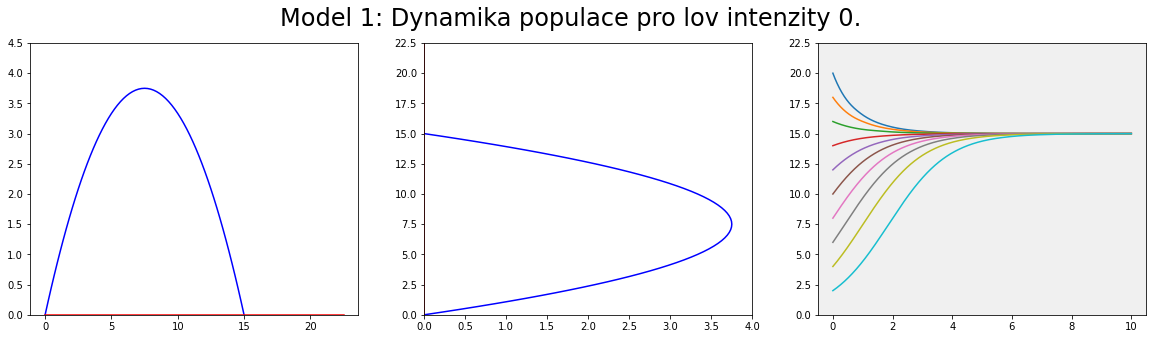

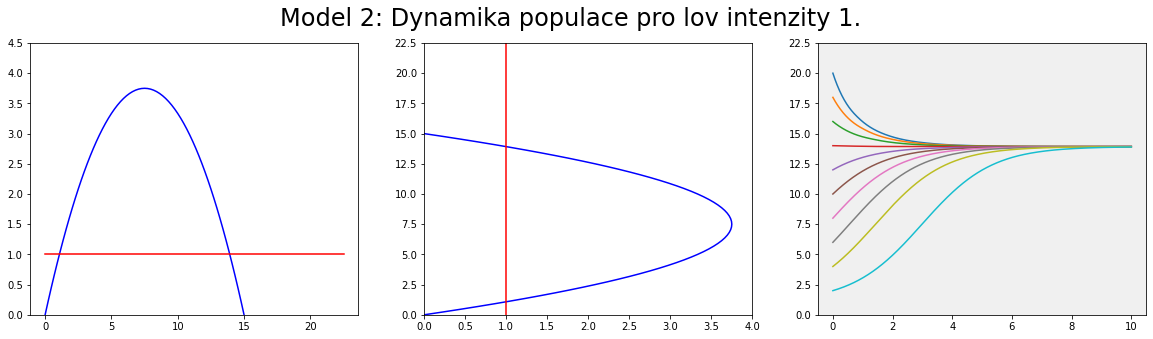

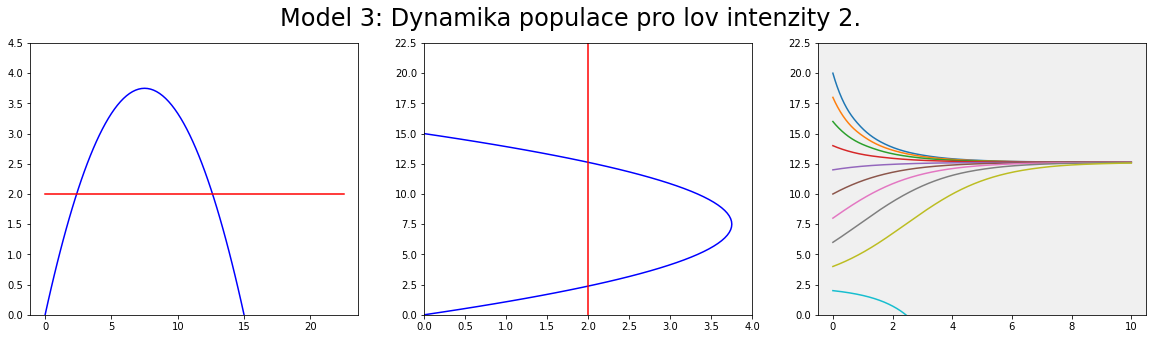

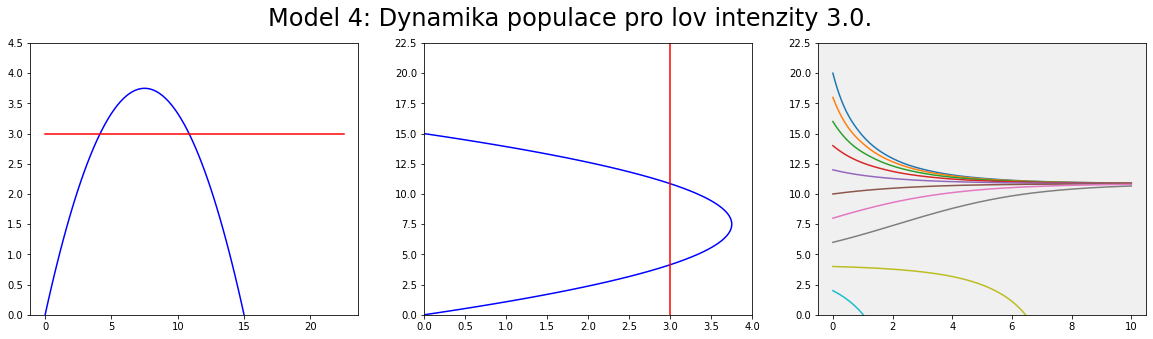

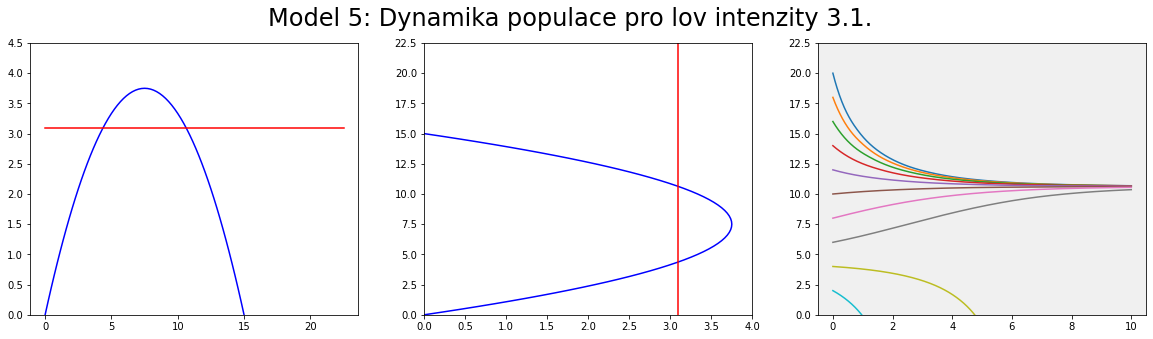

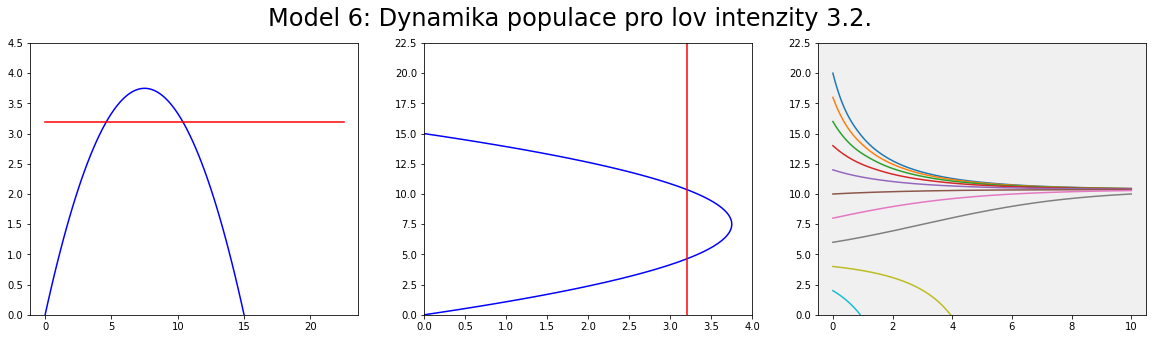

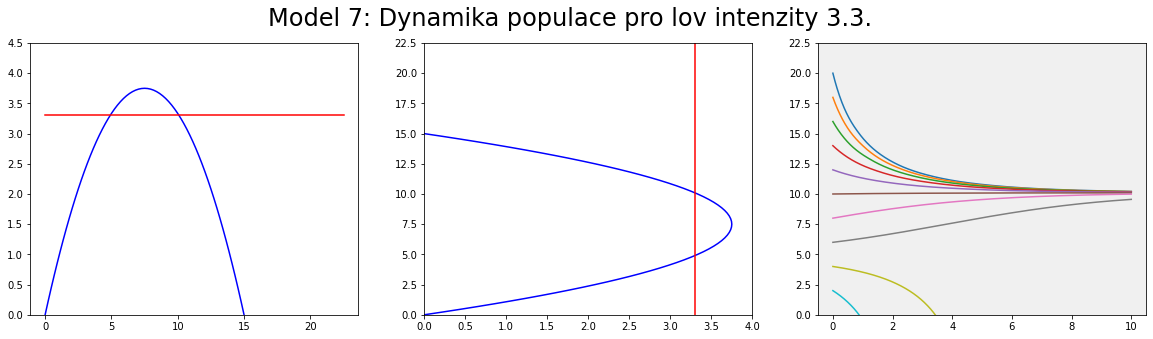

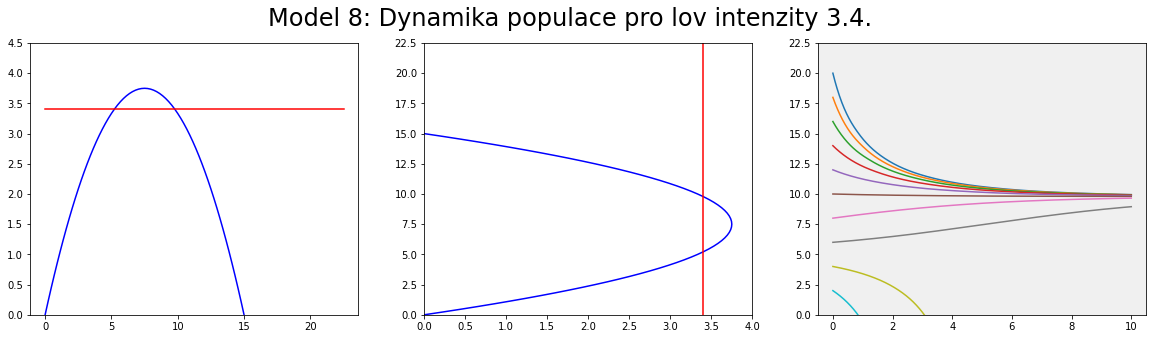

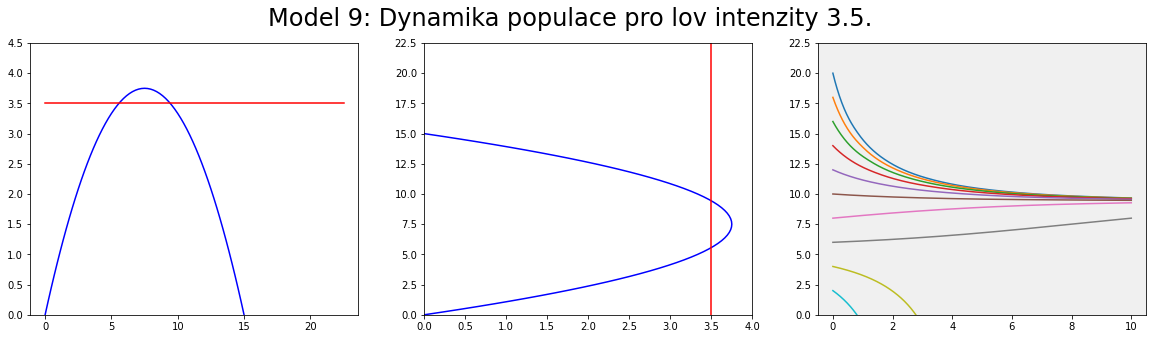

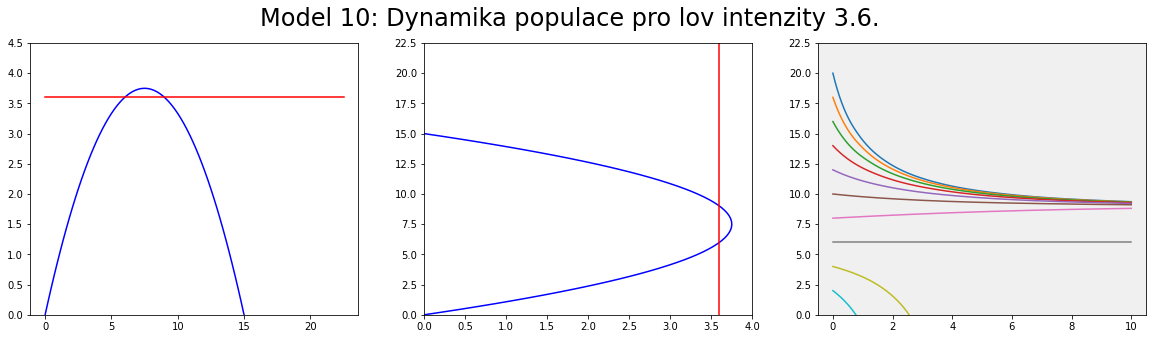

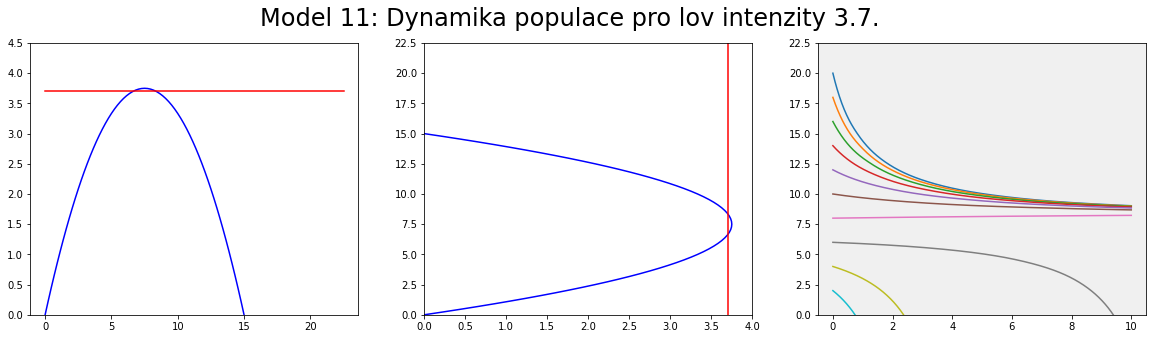

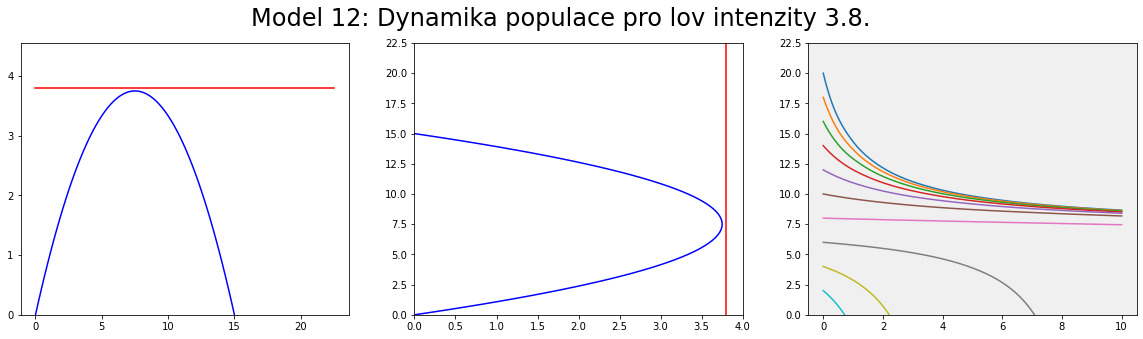

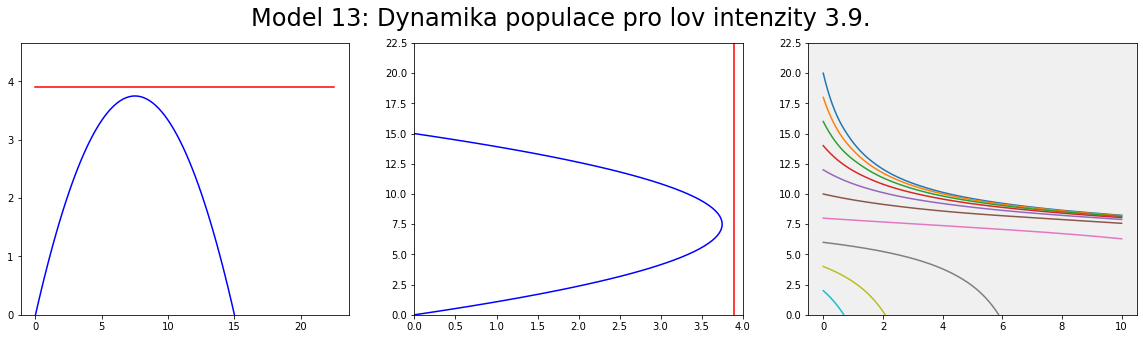

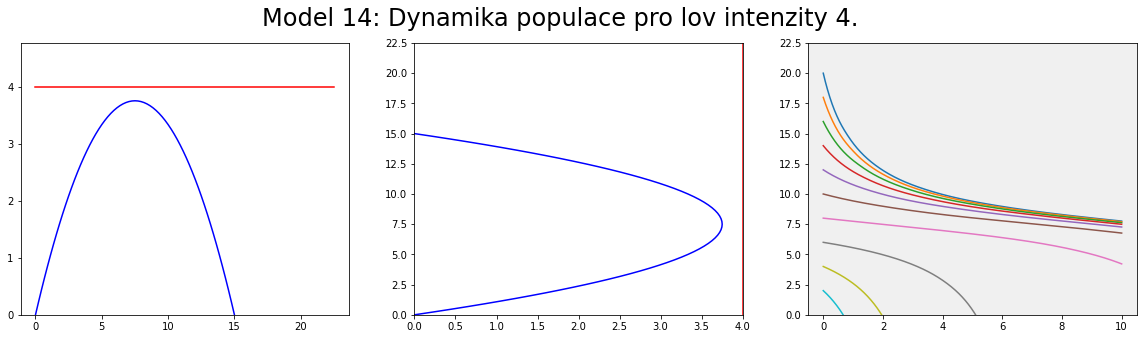

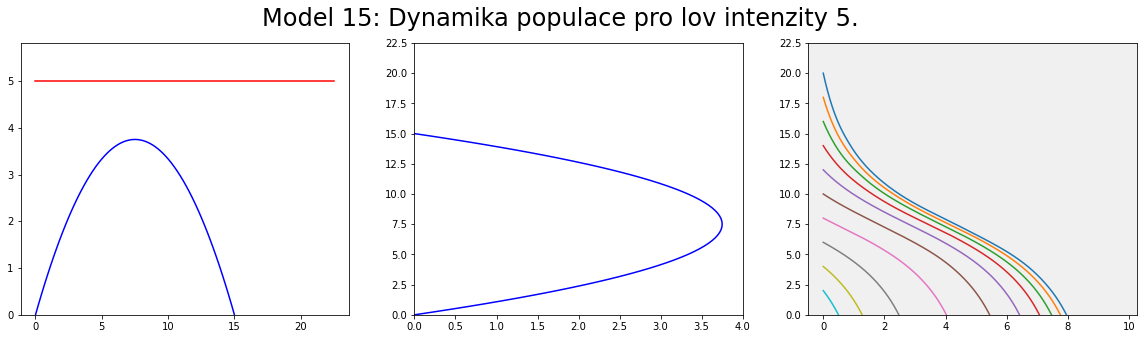

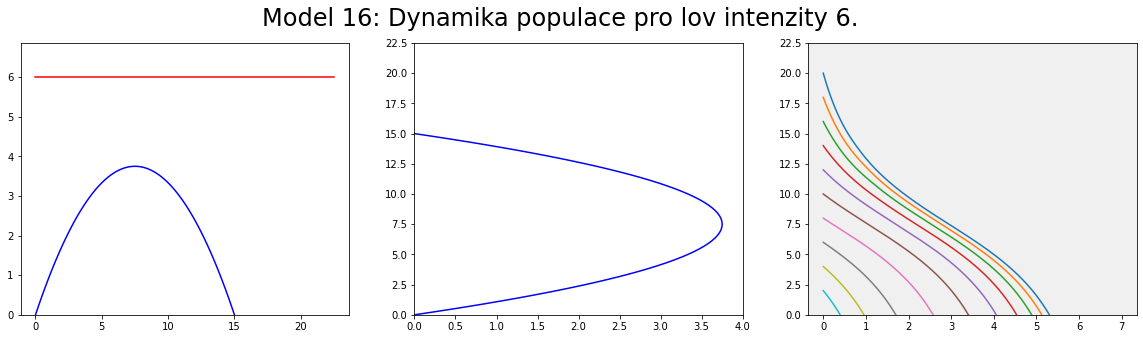

In [ ]:
r, K, h = 1, 15, 3.5
ymax = 1.5*K
tspan = numpy.linspace(0, 10, 1000)
xspan = numpy.linspace(0, ymax, 100)
x = xspan
count=0

strategie_lovu = [0,1,2] + list(numpy.linspace(3,4,10, endpoint=False) ) + [4,5,6]  # seznam intenzit lovu, po celých číslech, mezi trojkou a čtyřkou po desetiných

for h in strategie_lovu:                                  # cyklus přes různé strategie lovu
    fig, axes = plt.subplots(1, 3, figsize=(20,5))        # inicializace a nastavení obrázku, kreslíme tři obrázky vedle sebe
    count = count + 1
    fig.suptitle('Model %s: Dynamika populace pro lov intenzity %s.'%(count,h), fontsize=24)
    

    ax = axes[0]                            # kreslíme do prvního obrázku
    ax.plot(x,r*x*(1-x/K),color='blue')     # parabola
    ax.plot([x[0],x[-1]],[h,h], color='red')# vodorovná přímka pomocí krajních bodů
    ax.set_ylim([0,None])                   # osa od nuly

    ax = axes[1]                            # kreslíme do druhého obrázku
    ax.set_ylim([0,ymax])                   # nastavení rozsahu pro svislou osu
    ax.set_xlim([0,4])                      # nastavení rozsahu pro vodorovnou osu
    ax.plot(r*x*(1-x/K),x, color='blue')    # nakreslení otočené paraboly
    ax.plot([h,h],[x[0],x[-1]], color='red')# svislá přímka pomocí dvou bodů

    ax = axes[2]                  # kreslíme do třetího obrázku
    ax.set_ylim(0,ymax)           # nastavení rozsahu pro svislou osu
    for i in range(20,0,-2):      # cyklus přes počáteční podmínky
        sol = solve_ivp(lambda t, x: r*x*(1-x/K)-h, [tspan[0], tspan[-1]], [i], t_eval=tspan)
        ax.plot(sol.t, sol.y[0])  # vykreslení řešení

    ax.set_facecolor('#f0f0f0') # šedé pozadí obrázku

None